Documentation:

- https://spark.apache.org/docs/latest/api/python/index.html
- https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql.html

### Explore the COVID data

In [0]:
# Check out the pre-loaded dataset
#display(dbutils.fs.ls('dbfs:/databricks-datasets/COVID/covid-19-data/'))
display(dbutils.fs.ls('dbfs:/databricks-datasets/COVID/covid-19-data/'))

path,name,size,modificationTime
dbfs:/databricks-datasets/COVID/covid-19-data/.git/,.git/,0,0
dbfs:/databricks-datasets/COVID/covid-19-data/.github/,.github/,0,0
dbfs:/databricks-datasets/COVID/covid-19-data/.gitignore,.gitignore,10,1615898767000
dbfs:/databricks-datasets/COVID/covid-19-data/LICENSE,LICENSE,1289,1615898767000
dbfs:/databricks-datasets/COVID/covid-19-data/NEW-YORK-DEATHS-METHODOLOGY.md,NEW-YORK-DEATHS-METHODOLOGY.md,2771,1615898767000
dbfs:/databricks-datasets/COVID/covid-19-data/NYT-readme.md,NYT-readme.md,1748,1586273566000
dbfs:/databricks-datasets/COVID/covid-19-data/PROBABLE-CASES-NOTE.md,PROBABLE-CASES-NOTE.md,3162,1615898767000
dbfs:/databricks-datasets/COVID/covid-19-data/README.md,README.md,22959,1615898767000
dbfs:/databricks-datasets/COVID/covid-19-data/colleges/,colleges/,0,0
dbfs:/databricks-datasets/COVID/covid-19-data/excess-deaths/,excess-deaths/,0,0


In [0]:
# Display and read README file
spark.read.text('dbfs:/databricks-datasets/COVID/covid-19-data/README.md').display()

value
# Coronavirus (Covid-19) Data in the United States
""
"**NEW:** As the [us-counties.csv](us-counties.csv) file has grown too large to open in Excel, we're providing a new [us-counties-recent.csv](us-counties-recent.csv) file that contains only the most recent 30 days of data for each county. It is otherwise identical. Both files will continue to be updated."
""
"**Change:** As of Feb. 10, 2021, we are changing how we report data for a few low-population Alaska geographies to better align with how the state reports data. Data for Bristol Bay Borough and Lake and Peninsula Borough are combined in a new area called ""Bristol Bay plus Lake and Peninsula"", and data for Yakutat City and Borough and Hoonah-Angoon Census Area are combined as ""Yakutat plus Hoonah-Angoon"". Many cases now assigned to those new geographies were previously reported as Unknown. The entire timeseries will be revised to use these new geographies."
""
**NEW:** We are publishing the data behind our [survey of mask usage](https://www.nytimes.com/interactive/2020/07/17/upshot/coronavirus-face-mask-map.html) in the United States in order to provide researchers a way to understand the role of mask wearing in the course of the pandemic. See the data and documentation in the [mask-use/](mask-use/) directory.
""
**NEW:** We are publishing the data behind our [excess deaths tracker](https://www.nytimes.com/interactive/2020/04/21/world/coronavirus-missing-deaths.html) in order to provide researchers and the public with a better record of the true toll of the pandemic. This data is compiled from official national and municipal data for 24 countries. See the data and documentation in the [excess-deaths/](excess-deaths/) directory.
""


Open `us-states.csv` and explore the schema

In [0]:
states = (spark.read.format('csv')
            .option("header", "true")
            .option("InferSchema", "true")
            .load('dbfs:/databricks-datasets/COVID/covid-19-data/us-states.csv'))

# Display the dataframe
states.display()

date,state,fips,cases,deaths
2020-01-21,Washington,53,1,0
2020-01-22,Washington,53,1,0
2020-01-23,Washington,53,1,0
2020-01-24,Illinois,17,1,0
2020-01-24,Washington,53,1,0
2020-01-25,California,6,1,0
2020-01-25,Illinois,17,1,0
2020-01-25,Washington,53,1,0
2020-01-26,Arizona,4,1,0
2020-01-26,California,6,2,0


In [0]:
# Make a plot
states.display()

date,state,fips,cases,deaths
2020-01-21,Washington,53,1,0
2020-01-22,Washington,53,1,0
2020-01-23,Washington,53,1,0
2020-01-24,Illinois,17,1,0
2020-01-24,Washington,53,1,0
2020-01-25,California,6,1,0
2020-01-25,Illinois,17,1,0
2020-01-25,Washington,53,1,0
2020-01-26,Arizona,4,1,0
2020-01-26,California,6,2,0


In [0]:
# Print schema (in this case it was inferred on the read)
states.printSchema()

root
 |-- date: date (nullable = true)
 |-- state: string (nullable = true)
 |-- fips: integer (nullable = true)
 |-- cases: integer (nullable = true)
 |-- deaths: integer (nullable = true)



Explore the `us-counties.csv` and answer the following questions:
1. What's the time span of the data (first and last date)?
2. Agregate the table by state:
  - Which state has the most confirmed cases and confirmed deaths?
  - Make a plot.

In [0]:
# Read the us-counties.csv file and infer schema
counties = (spark.read.format('csv')
            .option("header", "true")
            .option("InferSchema", "true")
            .load('dbfs:/databricks-datasets/COVID/covid-19-data/live/us-counties.csv'))
counties.display()

date,county,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
2021-03-12,Autauga,Alabama,1001,6409,95,5523,85,886,10
2021-03-12,Baldwin,Alabama,1003,20072,294,14228,220,5844,74
2021-03-12,Barbour,Alabama,1005,2175,52,1217,35,958,17
2021-03-12,Bibb,Alabama,1007,2475,58,2009,34,466,24
2021-03-12,Blount,Alabama,1009,6282,129,4835,109,1447,20
2021-03-12,Bullock,Alabama,1011,1183,39,1057,29,126,10
2021-03-12,Butler,Alabama,1013,2037,66,1858,60,179,6
2021-03-12,Calhoun,Alabama,1015,14034,299,10551,240,3483,59
2021-03-12,Chambers,Alabama,1017,3439,112,1711,72,1728,40
2021-03-12,Cherokee,Alabama,1019,1787,42,1152,32,635,10


In [0]:
# Check the schema. What type is the date column?
counties.printSchema()

root
 |-- date: date (nullable = true)
 |-- county: string (nullable = true)
 |-- state: string (nullable = true)
 |-- fips: integer (nullable = true)
 |-- cases: integer (nullable = true)
 |-- deaths: integer (nullable = true)
 |-- confirmed_cases: integer (nullable = true)
 |-- confirmed_deaths: integer (nullable = true)
 |-- probable_cases: integer (nullable = true)
 |-- probable_deaths: integer (nullable = true)



In [0]:
# Convert `date` from string to date type
from pyspark.sql.functions import to_date
df = counties.withColumn("date", to_date("date", "yyyy-MM-dd"))

In [0]:
# First day in the dataset
from pyspark.sql.functions import min
min_date = counties.select(min('date')).collect()[0][0]
print(min_date)
counties.printSchema()

2021-03-12
root
 |-- date: date (nullable = true)
 |-- county: string (nullable = true)
 |-- state: string (nullable = true)
 |-- fips: integer (nullable = true)
 |-- cases: integer (nullable = true)
 |-- deaths: integer (nullable = true)
 |-- confirmed_cases: integer (nullable = true)
 |-- confirmed_deaths: integer (nullable = true)
 |-- probable_cases: integer (nullable = true)
 |-- probable_deaths: integer (nullable = true)



In [0]:
# Last day in the dataset 
from pyspark.sql.functions import desc

last_day = df.sort(desc('date')).first()['date']
print(last_day)

2021-03-12


In [0]:
# Aggregate confirmed cases and confirmed deaths per state
from pyspark.sql.functions import sum, col

# Aggregate confirmed cases and deaths per state
state_cases = df.groupBy('state').agg(sum('confirmed_cases').alias('total_confirmed_cases'), 
                                      sum('confirmed_deaths').alias('total_confirmed_deaths'))

# Show the resulting DataFrame
state_cases.show(5)

+--------------------+---------------------+----------------------+
|               state|total_confirmed_cases|total_confirmed_deaths|
+--------------------+---------------------+----------------------+
|                Utah|                85210|                   655|
|              Hawaii|                 null|                  null|
|           Minnesota|               469579|                  null|
|                Ohio|                 null|                  null|
|Northern Mariana ...|                  146|                     2|
+--------------------+---------------------+----------------------+
only showing top 5 rows



In [0]:
# Which state has the max confirmed cases?
from pyspark.sql.functions import desc

# Order the DataFrame by total_confirmed_cases in descending order
state_cases_ordered = state_cases.orderBy(desc('total_confirmed_cases'))

# Get the state with the maximum confirmed cases
max_cases_state = state_cases_ordered.first()['state']

print("The state with the maximum confirmed cases is", max_cases_state)

The state with the maximum confirmed cases is California


In [0]:
# Which state has the max confirmed deaths?
from pyspark.sql.functions import sum, desc

max_deaths_state = (states
                    .groupBy('state')
                    .agg(sum('deaths').alias('total_deaths'))
                    .sort(desc('total_deaths'))
                    .first()['state'])

print(f"The state with the max confirmed deaths is {max_deaths_state}")


The state with the max confirmed deaths is New York


In [0]:
# Do we have the data for all the states?
from pyspark.sql.functions import col, sum

# Compter le nombre de valeurs nulles dans chaque colonne
null_counts = counties.select([sum(col(c).isNull().cast("int")).alias(c) for c in counties.columns])

# Afficher les résultats
null_counts.show()


+----+------+-----+----+-----+------+---------------+----------------+--------------+---------------+
|date|county|state|fips|cases|deaths|confirmed_cases|confirmed_deaths|probable_cases|probable_deaths|
+----+------+-----+----+-----+------+---------------+----------------+--------------+---------------+
|   0|     0|    0|  30|    0|    78|            860|            1503|          1191|           2083|
+----+------+-----+----+-----+------+---------------+----------------+--------------+---------------+



In [0]:
# How many counties is in each state?
from pyspark.sql.functions import countDistinct

counties_per_state = counties.groupBy('state').agg(countDistinct('county').alias('counties_per_state'))
counties_per_state.show()

+--------------------+------------------+
|               state|counties_per_state|
+--------------------+------------------+
|                Utah|                30|
|              Hawaii|                 5|
|           Minnesota|                88|
|                Ohio|                89|
|Northern Mariana ...|                 2|
|              Oregon|                36|
|            Arkansas|                76|
|               Texas|               254|
|        North Dakota|                54|
|        Pennsylvania|                67|
|         Connecticut|                 9|
|            Nebraska|                93|
|             Vermont|                15|
|              Nevada|                17|
|         Puerto Rico|                79|
|          Washington|                39|
|            Illinois|               103|
|            Oklahoma|                78|
|      Virgin Islands|                 3|
|District of Columbia|                 1|
+--------------------+------------

Get familiar with the mask use study by reading the README.md

In [0]:
# Read the README file
spark.read.text('dbfs:/databricks-datasets/COVID/covid-19-data/mask-use/README.md').display()

value
# Mask-Wearing Survey Data
""
The New York Times is releasing estimates of [mask usage](https://www.nytimes.com/interactive/2020/07/17/upshot/coronavirus-face-mask-map.html) by county in the United States.
""
"This data comes from a large number of interviews conducted online by the global data and survey firm Dynata at the request of The New York Times. The firm asked a question about mask use to obtain 250,000 survey responses between July 2 and July 14, enough data to provide estimates more detailed than the state level. (Several states have imposed new mask requirements since the completion of these interviews.)"
""
"Specifically, each participant was asked: _How often do you wear a mask in public when you expect to be within six feet of another person?_"
""
"This survey was conducted a single time, and at this point we have no plans to update the data or conduct the survey again."
""


In [0]:
# create dataframe masks by reading dbfs:/databricks-datasets/COVID/covid-19-data/mask-use/mask-use-by-county.csv

from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("ReadCSV").getOrCreate()

# Read the CSV file into a DataFrame called masks
masks = spark.read.format("csv").option("header", "true").load("dbfs:/databricks-datasets/COVID/covid-19-data/mask-use/mask-use-by-county.csv")


In [0]:
# Make two groups of frequency of wearing masks: almost_never (NEVER+RARELY) and almost_always (FREQUENTLY+ALWAYS): masks_groups

from pyspark.sql.functions import when, col

# Créer deux groupes de fréquence : almost_never (NEVER+RARELY) et almost_always (FREQUENTLY+ALWAYS)
masks_groups = masks.withColumn('almost_never', when((col('NEVER') + col('RARELY')) > 0, 1).otherwise(0)) \
                    .withColumn('almost_always', when((col('FREQUENTLY') + col('ALWAYS')) > 0, 1).otherwise(0))
                    
# Afficher les résultats
masks_groups.show()



+--------+-----+------+---------+----------+------+------------+-------------+
|COUNTYFP|NEVER|RARELY|SOMETIMES|FREQUENTLY|ALWAYS|almost_never|almost_always|
+--------+-----+------+---------+----------+------+------------+-------------+
|   01001|0.053| 0.074|    0.134|     0.295| 0.444|           1|            1|
|   01003|0.083| 0.059|    0.098|     0.323| 0.436|           1|            1|
|   01005|0.067| 0.121|     0.12|     0.201| 0.491|           1|            1|
|   01007| 0.02| 0.034|    0.096|     0.278| 0.572|           1|            1|
|   01009|0.053| 0.114|     0.18|     0.194| 0.459|           1|            1|
|   01011|0.031|  0.04|    0.144|     0.286|   0.5|           1|            1|
|   01013|0.102| 0.053|    0.257|     0.137| 0.451|           1|            1|
|   01015|0.152| 0.108|     0.13|     0.167| 0.442|           1|            1|
|   01017|0.117| 0.037|     0.15|     0.136|  0.56|           1|            1|
|   01019|0.135| 0.027|    0.161|     0.158|  0.52| 

Questions:
1. Join the tables `masks_groups` and `counties`.
2. Do you find a correlation between wearing a mask and number of cases/deaths?
3. Plot

In [0]:
# Join masks_groups and counties: mask_use
mask_use = masks_groups.join(counties, masks_groups.COUNTYFP == counties.fips, "inner")

# Show the resulting DataFrame
mask_use.show()

+--------+-----+------+---------+----------+------+------------+-------------+----------+---------+-------+----+-----+------+---------------+----------------+--------------+---------------+
|COUNTYFP|NEVER|RARELY|SOMETIMES|FREQUENTLY|ALWAYS|almost_never|almost_always|      date|   county|  state|fips|cases|deaths|confirmed_cases|confirmed_deaths|probable_cases|probable_deaths|
+--------+-----+------+---------+----------+------+------------+-------------+----------+---------+-------+----+-----+------+---------------+----------------+--------------+---------------+
|   01001|0.053| 0.074|    0.134|     0.295| 0.444|           1|            1|2021-03-12|  Autauga|Alabama|1001| 6409|    95|           5523|              85|           886|             10|
|   01003|0.083| 0.059|    0.098|     0.323| 0.436|           1|            1|2021-03-12|  Baldwin|Alabama|1003|20072|   294|          14228|             220|          5844|             74|
|   01005|0.067| 0.121|     0.12|     0.201| 0.491

In [0]:
# What happened during the join? 
# It's a good practice to verify (count lines for counties, mask_groups and mask_use)


In [0]:
# Keep data for only one state
state_name = "New York"
state_data = df.filter(df.state == state_name)

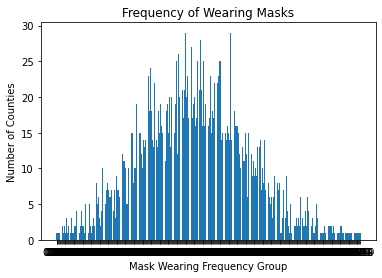

In [0]:
# How would you visualize the frequency groups? 
import matplotlib.pyplot as plt

# Select the frequency groups and count the number of counties in each group
freq_groups = mask_use.groupBy('FREQUENTLY').count().orderBy('FREQUENTLY')

# Convert the DataFrame to a Pandas DataFrame for plotting
freq_groups_pd = freq_groups.toPandas()

# Create the plot
plt.bar(freq_groups_pd['FREQUENTLY'], freq_groups_pd['count'])

# Set the plot title and axis labels
plt.title('Frequency of Wearing Masks')
plt.xlabel('Mask Wearing Frequency Group')
plt.ylabel('Number of Counties')

# Show the plot
plt.show()


In [0]:
# Save mask_use as a Parquet file
mask_use.write.format('parquet').save('file:///C:/Users/LENOVO/Desktop/mask01/mask_use.parquet')



In [0]:
# On how many partitions is this file partitioned: dbfs:/databricks-datasets/COVID/covid-19-data/mask-use/mask-use-by-county.csv?

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("PartitionCount").getOrCreate()

df = spark.read.csv("dbfs:/databricks-datasets/COVID/covid-19-data/mask-use/mask-use-by-county.csv", header=True)

num_partitions = df.rdd.getNumPartitions()

print("The file is partitioned into {} partitions.".format(num_partitions))


The file is partitioned into 1 partitions.


Re-do at least one excercise in SQL. (First you need to register the data as a table.)

In [0]:
%sql
SELECT *
FROM text.`/databricks-datasets/COVID/covid-19-data/README.md`;

CREATE TEMPORARY VIEW states
USING csv
OPTIONS (path "/databricks-datasets/COVID/covid-19-data/us-states.csv", header "true", inferSchema "true");

SELECT *
FROM states;


date,state,fips,cases,deaths
2020-01-21,Washington,53,1,0
2020-01-22,Washington,53,1,0
2020-01-23,Washington,53,1,0
2020-01-24,Illinois,17,1,0
2020-01-24,Washington,53,1,0
2020-01-25,California,6,1,0
2020-01-25,Illinois,17,1,0
2020-01-25,Washington,53,1,0
2020-01-26,Arizona,4,1,0
2020-01-26,California,6,2,0


## Retail dataset

Look at the `retail-org` dataset and answer the following questions:
  - For how long has individual customer been a client? (Determine the first and the last order and calculate the difference) (retail-org/sales_orders/)  
  - On average, how often does each client place an order? (How many orders did they placed for the time they are being clients?)
  - Calculate total expense per order for each client
  - What % of orders benefited from the promotion of at least one item? (retail-org/sales_orders/ and retail-org/active_promotions)